In [4]:
import numpy as np

mu = np.arange(0.05,1.05,0.05)
mu_s = 0.05

vs = 0.03 # m/s
u_star = 0.2 # m/s
kappa = 0.408

rouse = (vs / (kappa *  u_star))
print rouse

dI_dmu = (((1 - mu) / mu) * (mu_s / (1-mu_s)))**(vs / (kappa *  u_star))

I = np.sum((dI_dmu[1:] + np.diff(dI_dmu)) * np.diff(mu))

H = 1 # m
D50 = 0.00025 # m
ks = 2 * D50
g = 9.81 # m/s**2
R = 1.65
Um = 1 # m/s

Cm = 0.034 * (1 - (ks/H)**0.06) * (u_star**2 / (g * R * H)) * (Um / vs)

ko = 1.13
Cae = ko * Cm / I

d_star = Cae / Cm

d_star

0.367647058824


4.142780990228875

In [3]:
dI_dmu[1:]

array([ 0.75979154,  0.64095671,  0.56391752,  0.50732028,  0.4625467 ,
        0.4253145 ,  0.39319631,  0.36467879,  0.33874274,  0.31465127,
        0.29183042,  0.26979246,  0.24807581,  0.22618186,  0.20348126,
        0.17902402,  0.15102385,  0.11474665,  0.        ])

In [31]:
(vs / (kappa *  u_star))

0.3676470588235294

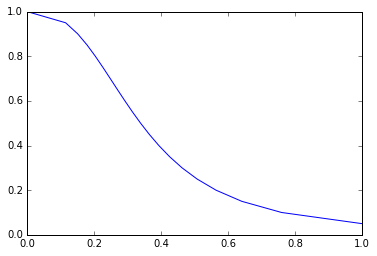

In [23]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.plot(dI_dmu, mu)

In [9]:
# formulation in Davy and Lague (2009)

from math import log
import numpy as np

vs = 0.03 # m/s
u_star = 0.15 # m/s
kappa = 0.408

D50 = 0.00025 # m
g = 9.81 # m/s**2
R = 1.65

z_o = D50/30

Hs = np.arange(0.05,1,0.1)

H = 1.

a = 0.05 * H
z = np.arange(a,H+a,a)

du_dz = map(log, z / z_o)
i_u = np.sum((du_dz[1:] + np.diff(du_dz)) * np.diff(z))

d_d = (((z - a)/(H - a)) * (a / z))

Z = (vs / (kappa *  u_star))

d_dz = d_d**Z * du_dz
i_ = np.sum((d_dz[1:] + np.diff(d_dz)) * np.diff(z))

d_star = i_u / i_

print Z
print d_d
print d_d**Z
print du_dz
print '-'
print d_dz
print i_
print i_u
print d_star


0.490196078431
[ 0.          0.02631579  0.03508772  0.03947368  0.04210526  0.04385965
  0.04511278  0.04605263  0.04678363  0.04736842  0.04784689  0.04824561
  0.048583    0.04887218  0.04912281  0.04934211  0.0495356   0.0497076
  0.0498615   0.05      ]
[ 0.          0.16811106  0.19357121  0.20507632  0.21166794  0.21594625
  0.21894899  0.22117324  0.22288725  0.22424866  0.22535618  0.2262748
  0.22704908  0.22771057  0.22828225  0.22878125  0.22922061  0.22961041
  0.2299586   0.2302715 ]
[8.699514748210191, 9.392661928770137, 9.798127036878302, 10.085809109330082, 10.308952660644293, 10.491274217438248, 10.645424897265505, 10.778956289890028, 10.896739325546411, 11.002099841204238, 11.097410021008562, 11.184421397998193, 11.26446410567173, 11.33857207782545, 11.407564949312402, 11.472103470449973, 11.532728092266408, 11.589886506106357, 11.643953727376633, 11.695247021764184]
-
[ 0.          1.57901032  1.89663526  2.06836064  2.18207481  2.26555131
  2.33080503  2.38401666  

In [10]:
print d_d**8.7

[  0.00000000e+00   1.80253086e-14   2.20216430e-13   6.13587726e-13
   1.07578766e-12   1.53449978e-12   1.96067947e-12   2.34592289e-12
   2.69039921e-12   2.99746074e-12   3.27135225e-12   3.51627791e-12
   3.73605574e-12   3.93402329e-12   4.11304658e-12   4.27556759e-12
   4.42366168e-12   4.55909344e-12   4.68336642e-12   4.79776573e-12]


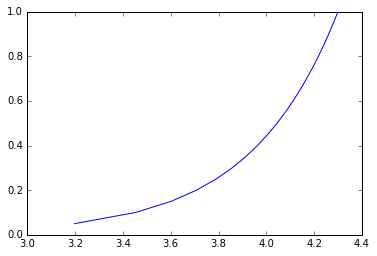

In [18]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.plot(u_star * np.array(du_dz)/ kappa, z)

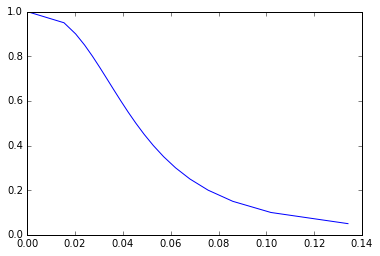

In [39]:
Z = (vs / (kappa *  u_star))
d_d = (((z - a)/(H - a)) * (a / z))

plt.plot(dI_dmu/np.sum(dI_dmu), z)

In [42]:
dI_dmu/np.sum(dI_dmu) * 

array([ 0.13413326,  0.10191331,  0.08597361,  0.07564009,  0.06804852,
        0.06204289,  0.05704882,  0.0527407 ,  0.04891555,  0.04543667,
        0.0422052 ,  0.03914416,  0.03618814,  0.03327522,  0.03033851,
        0.0272936 ,  0.02401307,  0.02025732,  0.01539134,  0.        ])

In [26]:
dI_dmu

array([ 1.        ,  0.75979154,  0.64095671,  0.56391752,  0.50732028,
        0.4625467 ,  0.4253145 ,  0.39319631,  0.36467879,  0.33874274,
        0.31465127,  0.29183042,  0.26979246,  0.24807581,  0.22618186,
        0.20348126,  0.17902402,  0.15102385,  0.11474665,  0.        ])

In [34]:
vel = (u_star/kappa) * np.array(du_dz)

In [38]:
np.mean(vel * dI_dmu/np.sum(dI_dmu))

0.25322993807816996

In [92]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

g = 9.81
h = 1
S = 0.001
Cb = 0.001
d = 0.01
U = h**0.66 * S**0.5 / 0.03

dS = np.arange(0.02,1.,0.05)

ad = d**2 / dS**2

Cd = ((g * h * S) - ((1 - ad) * Cb * U**2)) / (0.5 * ad * (h/d) * U**2)



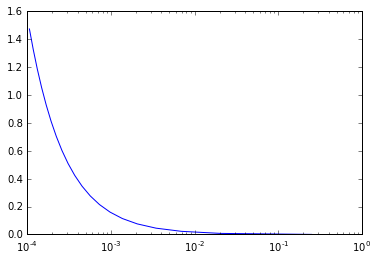

In [93]:
plt.semilogx(ad,Cd)

In [94]:
a = ((g * h * S) - ((1 - ad) * Cb * U**2))

In [95]:
a

array([ 0.00897667,  0.00872156,  0.0087066 ,  0.00870273,  0.00870118,
        0.00870041,  0.00869997,  0.0086997 ,  0.00869952,  0.00869939,
        0.0086993 ,  0.00869923,  0.00869918,  0.00869914,  0.0086991 ,
        0.00869908,  0.00869905,  0.00869904,  0.00869902,  0.00869901])

In [96]:
b = 0.5 * ad * (h/d) * U**2

In [97]:
b

array([  1.38888889e+01,   1.13378685e+00,   3.85802469e-01,
         1.92233756e-01,   1.14784206e-01,   7.62078951e-02,
         5.42534722e-02,   4.05811217e-02,   3.14940791e-02,
         2.51496404e-02,   2.05456936e-02,   1.70992784e-02,
         1.44525379e-02,   1.23759313e-02,   1.07167353e-02,
         9.37013924e-03,   8.26227774e-03,   7.33988051e-03,
         6.56374711e-03,   5.90451223e-03])

In [98]:
a/b

array([  6.46320000e-04,   7.69242000e-03,   2.25675200e-02,
         4.52716200e-02,   7.58047200e-02,   1.14166820e-01,
         1.60357920e-01,   2.14378020e-01,   2.76227120e-01,
         3.45905220e-01,   4.23412320e-01,   5.08748420e-01,
         6.01913520e-01,   7.02907620e-01,   8.11730720e-01,
         9.28382820e-01,   1.05286392e+00,   1.18517402e+00,
         1.32531312e+00,   1.47328122e+00])

In [99]:
ad

array([  2.50000000e-01,   2.04081633e-02,   6.94444444e-03,
         3.46020761e-03,   2.06611570e-03,   1.37174211e-03,
         9.76562500e-04,   7.30460190e-04,   5.66893424e-04,
         4.52693526e-04,   3.69822485e-04,   3.07787011e-04,
         2.60145682e-04,   2.22766763e-04,   1.92901235e-04,
         1.68662506e-04,   1.48720999e-04,   1.32117849e-04,
         1.18147448e-04,   1.06281220e-04])

In [34]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

d = 0.003
h = 0.0001
dS = np.arange(0.01,1,0.05)

ad = np.arange(0.001,0.02,0.001)

ad = 0.001

mix_length = ((d - h) / 0.01) * ad + h

mix_length

0.00039000000000000005

In [28]:
ad

array([ 0.001,  0.002,  0.003,  0.004,  0.005,  0.006,  0.007,  0.008,
        0.009,  0.01 ,  0.011,  0.012,  0.013,  0.014,  0.015,  0.016,
        0.017,  0.018,  0.019])

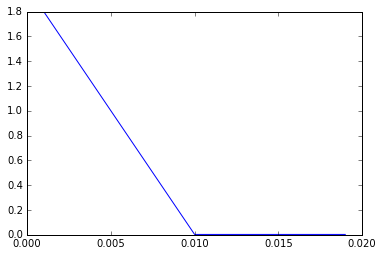

In [29]:
plt.plot(ad,mix_length)

In [16]:
from math import sqrt

d = np.arange(0.001,0.1,0.001)
h = np.arange(0,)

0.00316227766016838

In [210]:
import numpy as np
from math import log

h = 0.15
d = 0.0064
ad = np.arange(1e-3,1e-1,0.001)
U = 0.055
Cb = 0.001
g = 9.81
dhdx = 1.33467 * ad**3 - 0.363454 * ad**2 + 0.0331003 * ad - 0.0000109427
# Cd = (g * h * dhdx - (1-ad) * Cb * U**2) / (0.5 * ad * (h/d) * U**2)

Cd = 56.11 * ad**2 - 15.28*ad + 1.38 - 0.0005465/ad
Cd[ad < ad[Cd == Cd.max()]] = Cd.max()

In [211]:
from matplotlib import pyplot as plt
%matplotlib inline

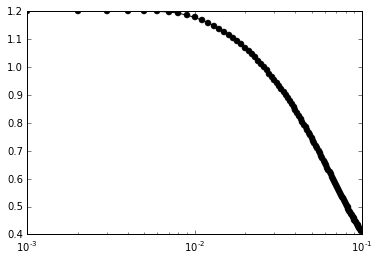

In [212]:
plt.semilogx(ad, Cd, 'ko-')

In [213]:
Cd

array([ 1.19925663,  1.19925663,  1.19925663,  1.19925663,  1.19925663,
        1.19925663,  1.19771796,  1.19303854,  1.18630269,  1.178161  ,
        1.16902749,  1.15917817,  1.14880413,  1.13804185,  1.12699142,
        1.11572791,  1.10430873,  1.09277853,  1.08117255,  1.069519  ,
        1.0578407 ,  1.04615633,  1.03448132,  1.02282853,  1.01120875,
        0.99963113,  0.98810345,  0.97663238,  0.96522368,  0.95388233,
        0.94261268,  0.93141851,  0.92030318,  0.90926963,  0.89832046,
        0.887458  ,  0.87668432,  0.86600126,  0.85541049,  0.8449135 ,
        0.83451164,  0.82420614,  0.81399809,  0.80388851,  0.79387831,
        0.78396833,  0.77415933,  0.76445202,  0.75484705,  0.745345  ,
        0.73594642,  0.72665182,  0.71746167,  0.70837639,  0.69939639,
        0.69052203,  0.68175367,  0.67309163,  0.6645362 ,  0.65608767,
        0.64774629,  0.63951232,  0.63138599,  0.6233675 ,  0.61545706,
        0.60765486,  0.59996107,  0.59237588,  0.58489942,  0.57

In [42]:
ad = 1e-3
dhdx = 0.00003

Cd = (g * h * dhdx - (1-ad) * Cb * U**2) / (0.5 * ad * (h/d) * U**2)

Cd

1.1600544793388434

In [75]:
ad = 1e-1
dhdx = 0.001

Cd = (g * h * dhdx - (1-ad) * Cb * U**2) / (0.5 * ad * (h/d) * U**2)

Cd

0.4143328264462811

In [110]:
ad = 1e-2
dhdx = 0.00027

Cd = (g * h * dhdx - (1-ad) * Cb * U**2) / (0.5 * ad * (h/d) * U**2)

Cd

1.1123242314049588

In [122]:
ad = 3e-2
dhdx = 0.0007

Cd = (g * h * dhdx - (1-ad) * Cb * U**2) / (0.5 * ad * (h/d) * U**2)

Cd

0.9658094839302114

In [149]:
ad = 7e-2
dhdx = 0.001

Cd = (g * h * dhdx - (1-ad) * Cb * U**2) / (0.5 * ad * (h/d) * U**2)

Cd

0.5918674663518301

In [79]:
log()

-9.797979797979798e-06

In [82]:
len(ad)

99

In [128]:
dhdx = 0.000213157 * np.array(map(log,ad)) + 0.00142308

In [163]:
dhdx

array([  2.17954807e-05,   5.38147614e-05,   8.51231501e-05,
         1.15728655e-04,   1.45639284e-04,   1.74863045e-04,
         2.03407946e-04,   2.31281995e-04,   2.58493200e-04,
         2.85049570e-04,   3.10959112e-04,   3.36229834e-04,
         3.60869744e-04,   3.84886850e-04,   4.08289161e-04,
         4.31084684e-04,   4.53281428e-04,   4.74887399e-04,
         4.95910608e-04,   5.16359060e-04,   5.36240765e-04,
         5.55563730e-04,   5.74335964e-04,   5.92565474e-04,
         6.10260269e-04,   6.27428356e-04,   6.44077744e-04,
         6.60216440e-04,   6.75852453e-04,   6.90993790e-04,
         7.05648460e-04,   7.19824471e-04,   7.33529830e-04,
         7.46772546e-04,   7.59560626e-04,   7.71902080e-04,
         7.83804914e-04,   7.95277136e-04,   8.06326756e-04,
         8.16961780e-04,   8.27190217e-04,   8.37020075e-04,
         8.46459362e-04,   8.55516085e-04,   8.64198254e-04,
         8.72513875e-04,   8.80470957e-04,   8.88077509e-04,
         8.95341537e-04,

In [204]:
Cd.max()

1.1992566266666664

In [168]:
ad[Cd == Cd.max()]

array([ 0.006])

In [176]:
1.4715 / 0.035

42.04285714285714

In [177]:
a1 = 1.33467 * 42.04285714285714
a2 = - 0.363454 * 42.04285714285714
a3 = 0.0331003 * 42.04285714285714
a4 = - 0.0000109427 * 42.04285714285714

In [178]:
a1

56.11334014285713

In [179]:
a2

-15.280644599999999

In [180]:
a3

1.391631184285714

In [185]:
a4 - 8.643e-5

-0.0005464923728571428

In [184]:
a4

-0.0004600623728571428

In [186]:
1.392 + 8.643e-5

1.39208643

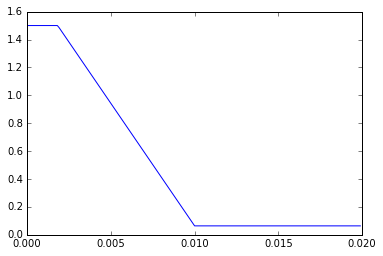

In [56]:
import numpy as np
from math import sqrt
from matplotlib import pyplot as plt
%matplotlib inline

ad = np.arange(1e-4,1,1e-3)

h = 1.5
d = 0.064
dS = np.array(map(sqrt,d**2 / ad))

ad_h = d**2 / h**2
ad = np.arange(0,2e-2,1e-4)

ell = (d-h) / (0.01 - ad_h) * ad + (h - ((d-h) / (0.01 - ad_h) * ad_h))

ell[ad <= ad_h] = h
ell[ad > 0.01] = d

plt.plot(ad, ell)

In [57]:
((d-h) / (0.01 - ad_h) * ad_h)

-0.31959660943273194

In [50]:
ad_h

0.0018204444444444446

In [29]:
h

0.15

In [42]:
(d-h) / (0.01 - ad_h) * ad + (h - ((d-h) / (0.01 - ad_h) * ad_h))

array([ 0.15      ,  0.13244403,  0.11488807,  0.0973321 ,  0.07977614,
        0.06222017,  0.0446642 ,  0.02710824,  0.00955227])

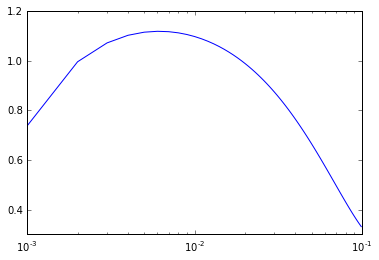

In [64]:
ad = np.arange(1e-3,1e-1,0.001)

Cd = (56.11 * ad**2 - 15.28 * ad + 1.3 - 0.0005465 / ad)

plt.semilogx(ad, Cd)

In [65]:
ad[Cd == Cd.max()]

array([ 0.006])

In [67]:
d/sqrt(0.006)

0.8262364471909156

In [73]:
d**2/0.2**2

0.10239999999999998